## <b><span style='color:#F1C40F'>|</span> Завантажуємо базу параметрів квітів iris dataset: </b>

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

np.random.seed = 2021

from sklearn.datasets import load_iris

iris = load_iris()
print('data contains:', iris.keys(), '\n')

# Отримуємо ознаки (X), мітки класу (y), назви класів та ознак
X, y, labels, feature_names = iris.data, iris.target, iris.target_names, iris['feature_names']

# Створюємо DataFrame із ознаками та мітками
df_iris = pd.DataFrame(X, columns= feature_names) 
df_iris['label'] =  y

# Створюємо словник для відповідності міток та назв класів
features_dict = {k:v for k,v in  enumerate(labels)}

# Додаємо колонку з назвами класів до DataFrame
df_iris['label_names'] = df_iris.label.apply(lambda x: features_dict[x])
df_iris

data contains: dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']) 



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


## <b><span style='color:#F1C40F'>|</span> Перемішуємо записи у завантаженій базі: </b>

In [2]:
df_iris = df_iris.sample(frac=1, random_state=42).reset_index(drop=True)
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,label_names
0,6.1,2.8,4.7,1.2,1,versicolor
1,5.7,3.8,1.7,0.3,0,setosa
2,7.7,2.6,6.9,2.3,2,virginica
3,6.0,2.9,4.5,1.5,1,versicolor
4,6.8,2.8,4.8,1.4,1,versicolor
...,...,...,...,...,...,...
145,6.1,2.8,4.0,1.3,1,versicolor
146,4.9,2.5,4.5,1.7,2,virginica
147,5.8,4.0,1.2,0.2,0,setosa
148,5.8,2.6,4.0,1.2,1,versicolor


## <b><span style='color:#F1C40F'>|</span> Нормалізуємо параметри квітів ірису: </b>

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled  = scaler.fit_transform(X)
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

## <b><span style='color:#F1C40F'>|</span> Розділимо існуючі записи на навчальну і тестову вибірку: </b>

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
print(f'Вигляд X_train: {X_train[:5]}\n')
print(f'Вигляд X_test: {X_test[:5]}\n')
print(f'Вигляд y_train: {y_train[:5]}\n')
print(f'Вигляд y_test: {y_test[:5]}\n')

Вигляд X_train: [[-1.50652052  1.24920112 -1.56757623 -1.3154443 ]
 [-0.17367395  3.09077525 -1.2833891  -1.05217993]
 [ 1.03800476  0.09821729  0.36489628  0.26414192]
 [-1.26418478  0.78880759 -1.22655167 -1.3154443 ]
 [-1.74885626  0.32841405 -1.39706395 -1.3154443 ]]

Вигляд X_test: [[ 3.10997534e-01 -5.92373012e-01  5.35408562e-01  8.77547895e-04]
 [-1.73673948e-01  1.70959465e+00 -1.16971425e+00 -1.18381211e+00]
 [ 2.24968346e+00 -1.05276654e+00  1.78583195e+00  1.44883158e+00]
 [ 1.89829664e-01 -3.62176246e-01  4.21733708e-01  3.95774101e-01]
 [ 1.15917263e+00 -5.92373012e-01  5.92245988e-01  2.64141916e-01]]

Вигляд y_train: [0 0 1 0 0]

Вигляд y_test: [1 0 2 1 1]



## <b><span style='color:#F1C40F'>|</span> Навчити KNN-класифікатор з різними значеннями K: </b>

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = list(range(1, 24, 2))
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Навчання
    knn.fit(X_train, y_train)
    
    # Прогнозування міток
    y_pred = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    
    results.append(
        {
            'K': k, 
            'Accuracy': accuracy
        }
    )
    print(f'Для K={k}, точність = {accuracy:.4f}')

Для K=1, точність = 0.9667
Для K=3, точність = 1.0000
Для K=5, точність = 1.0000
Для K=7, точність = 1.0000
Для K=9, точність = 1.0000
Для K=11, точність = 1.0000
Для K=13, точність = 1.0000
Для K=15, точність = 1.0000
Для K=17, точність = 1.0000
Для K=19, точність = 0.9667
Для K=21, точність = 1.0000
Для K=23, точність = 1.0000


## <b><span style='color:#F1C40F'>|</span> Вибираємо величину K для найкращих показників якості класифікацій у тестовій вибірці: </b>

Найкращий k = 3 , точність = 1.0


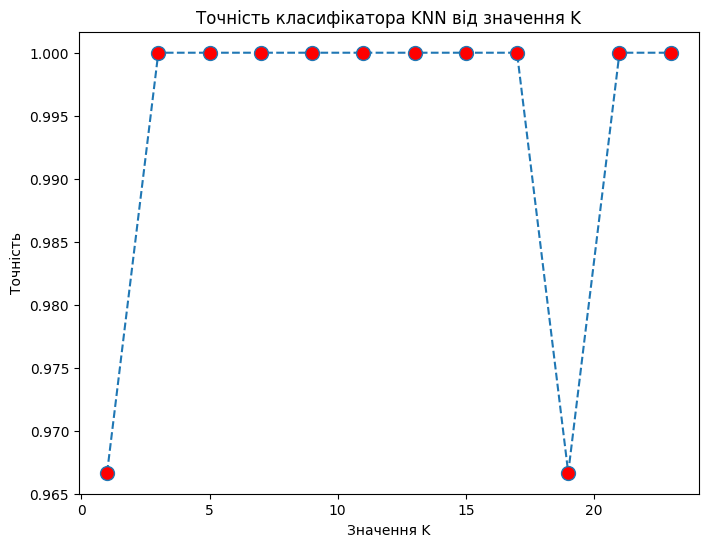

In [6]:
# Знаходження найкращого K на основі точності
best_result = max(results, key=lambda x: x['Accuracy'])
k_best = best_result['K']
score_best = best_result['Accuracy']

# Виведення найкращого K та відповідної точності
print('Найкращий k = {} , точність = {}'.format(k_best, score_best))

# Видобуття значень K та значень точності для побудови графіку
k_values = [result['K'] for result in results]
accuracy_values = [result['Accuracy'] for result in results]

# Побудова графіку
plt.figure(figsize=(8, 6))
plt.plot(k_values, accuracy_values, marker='o', linestyle='dashed', markerfacecolor='red', markersize=10)
plt.xlabel('Значення K')
plt.ylabel('Точність')
plt.title('Точність класифікатора KNN від значення K')
plt.show()